# HW 09. Linear Regression

We continue to work with the same [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data source as the last time.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
%matplotlib inline

Import the data to a dataframe:

In [2]:
data = pd.read_csv('teenagers.csv', index_col='Index')

**Task 1:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add the plots of the two linear regressions to the graph: one with the coefficients ($w_0, w_1) = (60, 0.05)$ and the other with ($w_0, w_1) = (50, 0.16)$. Do the regressions approximate the data well? Don't forget to label the axis and add a title to the figure.

<Figure size 432x288 with 0 Axes>

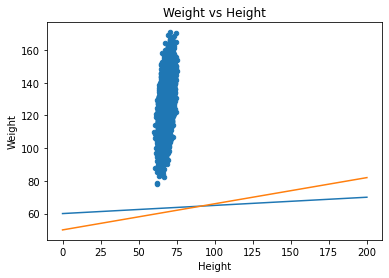

In [48]:
fig = plt.figure()
xx = np.linspace(0, 200, 200)
data.plot(x = 'Height', y = 'Weight', kind = 'scatter', title = 'Weight vs Height')
plt.xlabel('Height')
plt.ylabel('Weight')
w0_1, w1_1 = 60, .05
w0_2, w1_2 = 50, .16
plt.plot(xx, w1_1 * xx + w0_1)
plt.plot(xx, w1_2 * xx + w0_2)
plt.show()
#no these regressions do not approximate the data well at all


**Task 2:** Write a python fucntion error(X, Y, w0, w1), which calculates the Loss Function $Q(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $

In [30]:
def error(x, y, w0, w1):
    retval = 0
    errarray = (y - (w0 + w1 * x)) ** 2
    retval = sum(errarray)
    return retval

**Task 3:** Plot the loss function vs $w_1$ with a fixed value of $w_0 = 50$ for your dataset. Where approximately does the function reaches its minimum?

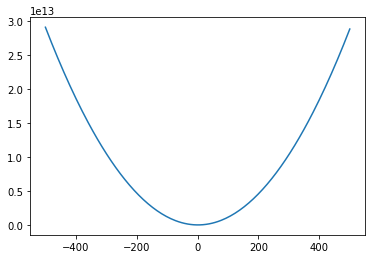

In [33]:
fig = plt.figure()
ax = plt.axes()
errors_len = 200 
ww1 = np.linspace(-500, 500, errors_len)
ww0 = np.zeros(errors_len) + 50
errors_arr = np.zeros(errors_len)
for i in range(0, errors_len):
    errors_arr[i] = error(data['Height'], data['Weight'], ww0[i], ww1[i])
ax.plot(ww1, errors_arr)
plt.show()
    

**Task 4:** Use the method *minimize_scalar* from the module *scipy.optimize* to find the minimum of your Loss function for a fixed value of $w_0 = 50$. Make the method to look for the minimum in the range $ -5 \le w_1 \le 5$.

In [47]:
def err50(w1):
    return error(data['Height'], data['Weight'], 50, w1)

w1_opt = minimize_scalar(err50, bounds = (-100, 300))
w1_opt.x

1.1351597092091665

**Task 5:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add to the graph a plot of the linear regression with $w_0 = 50$, and $w_0 = \text{the value you found in Task 4}$. Does this linear regression model the data better than the one from the Task 1?

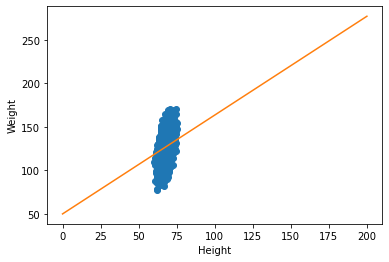

In [51]:
fig = plt.figure()
xx = np.linspace(0, 200, 200)
plt.plot(data['Height'], data['Weight'], 'o')
plt.xlabel('Height')
plt.ylabel('Weight')
w0_1, w1_1 = 50, w1_opt.x
plt.plot(xx, w1_1 * xx + w0_1)
plt.show()

#this model is slightly better

**Task 6:** Make a 3D plot of the Loss function vs both $w_0$ and $w_1$. Label the axis and add a title to the plot. According to the plot, where should we look for the miminum of the loss function?

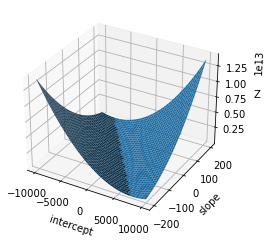

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection = '3d')

X = np.linspace(-10000, 10000, 40)
Y = np.linspace(-200, 200, 40)

Z = np.zeros((len(X),len(Y)))

def err2d(w0, w1):
    return error(data['Height'], data['Weight'], w0, w1)

for i in range(0,len(X)):
    for j in range(0,len(Y)):
        Z[i,j] = err2d(X[i], Y[j])
        
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
ax.set_zlabel('Z')
plt.show()
    

**Task 7:** Use the method *minimize* from the module *scipy.optimize* to find the minimum of the loss function. Make the method to look for the minimum inside the range $-100 \le w_0 \le 100$, $-5 \le w_1 \le 5$. Use the argument *method='L-BFGS-B'*

In [53]:
def error2D(w):
    return error(data['Height'], data['Weight'], w[0], w[1])
res = minimize(error2D, (0,0), method = 'L-BFGS-B')
res.x
    

array([-82.60496837,   3.08391066])

**Task 8:** Use the method plot() from the module matplotlib.pyplot to plot the dependence of the weight on the height from the dataset. Add to the graph a plot of the linear regression with $w_0 = w_0 = \text{the value you found in Task 7}$, and $w_0 = \text{the value you found in Task 7}$.

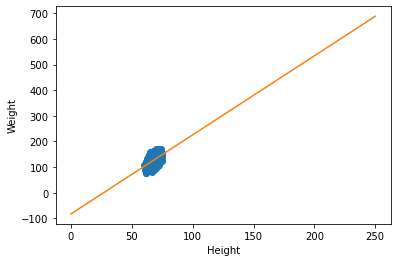

In [54]:
fig1 = plt.figure()
xx = np.linspace(0, 250, 200)
plt.plot(data['Height'], data['Weight'], 'o')
plt.xlabel('Height')
plt.ylabel('Weight')
w0_1, w1_1 = res.x[0], res.x[1]
plt.plot(xx, w1_1 * xx + w0_1)
plt.show()

#by far the best model